In [1]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

# Analysing Stocks:
## 1. Preparing data - 


In [2]:
# reading nifty-50 & preparing symbols
nifty50 = pd.read_csv("../data/nifty_200.csv")
symbols = nifty50["Symbol"] + ".NS"
symbols = symbols.to_list()

symbols.index("SBIN.NS")

165

In [3]:
sym = symbols[12]
print(f"downloading {sym} stocks data ...")
data = yf.download(sym, start="2010-01-01", end="2023-12-26")
data.index.names = ['date']
data.columns = data.columns.str.lower()
data

downloading ABFRL.NS stocks data ...
[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume
date,,,,,,
2013-07-17,174.000000,174.000000,165.300003,166.000000,166.000000,115310
2013-07-18,157.699997,165.000000,157.699997,164.850006,164.850006,22149
2013-07-19,160.000000,161.800003,156.649994,156.649994,156.649994,28708
2013-07-22,150.000000,155.000000,148.850006,149.600006,149.600006,11739
2013-07-23,142.500000,147.000000,142.149994,144.550003,144.550003,9163
...,...,...,...,...,...,...
2023-12-18,233.699997,236.250000,229.600006,233.449997,233.449997,1941387
2023-12-19,233.449997,234.500000,230.399994,231.000000,231.000000,1011975
2023-12-20,231.500000,233.699997,216.449997,217.350006,217.350006,4440669


## 2. getting insights of data:
Since closing price is the most importe=ant indicator let's find out what can find out from it.

In [15]:
# finding out adj close
data['adj close'].describe()

count    1560.000000
mean      119.556987
std        38.843825
min        40.049999
25%        92.849998
50%       113.075001
75%       147.649994
max       237.500000
Name: adj close, dtype: float64

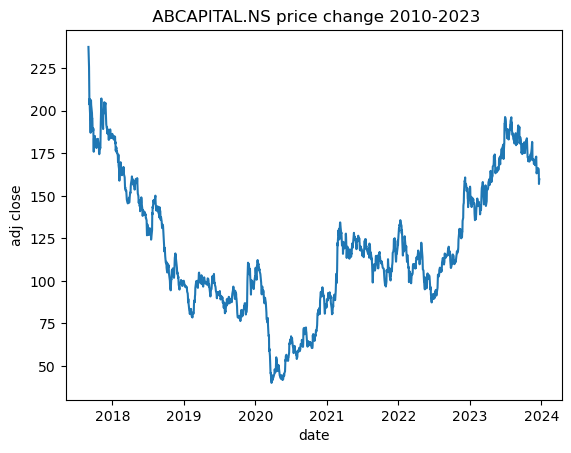

In [16]:
sn.lineplot(data=data['adj close'])
plt.title(f" {symbols[11]} price change 2010-2023")
plt.show()

#### now find out the distribution

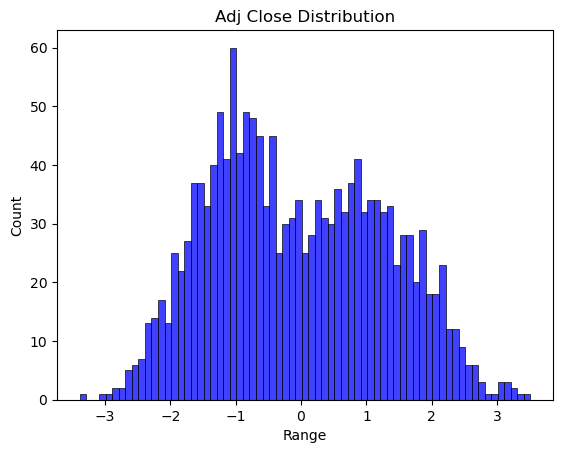

In [17]:
# let's calculate 20 day moivng average and fit normalize it with 20-day MA and std
mean = 20

ma_20 = data['adj close'].rolling(mean).mean()
std = data['adj close'].rolling(mean).std()

n_close = (data['adj close'] - ma_20) / std

# now visualize it 
sn.histplot(n_close, binwidth=0.1, color="blue")
plt.title("Adj Close Distribution")
plt.ylabel("Count")
plt.xlabel("Range")

plt.show()

*this fig show that price approximatly follows normal distribution and most of price stay b/w 3 times  .</br>
we can use it to develop a trading strategy further in this notebook. 

#### let's see what can we conclude on week day basis.


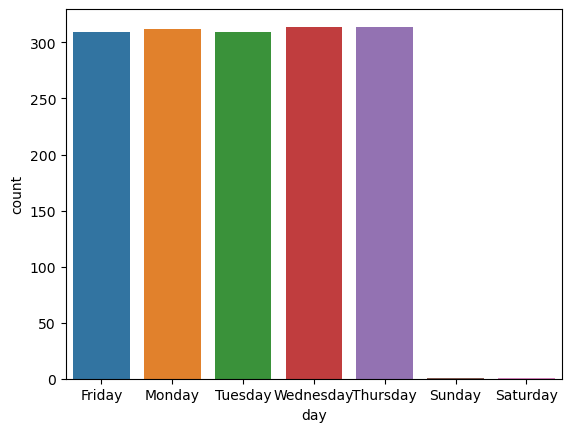

In [19]:
# to cater this we need to add some more columns to our data
data['day'] = data.index.day_name()                         # let's add week day name to every row
data['pct_change'] = data['adj close'].pct_change()         # calculate daily percentage change

# now visualize it for better understanding of data.
sn.countplot(data=data, x="day")
plt.show()

In [41]:
data.groupby('day', )['pct_change'].std() * 100

day
Friday       2.263535
Monday       3.002700
Saturday          NaN
Sunday            NaN
Thursday     2.422699
Tuesday      2.364778
Wednesday    2.201692
Name: pct_change, dtype: float64

## 3. Now calculate features and indicators for analysis -  
+ RSI
+ MACD 
+ ADX
+ ATR
+ Bollinger bands